In [3]:
from transformers import AutoModel
from tqdm import tqdm
# Initialize the model
embedding_model = AutoModel.from_pretrained("jinaai/jina-embeddings-v3", trust_remote_code=True)


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- mha.py
- block.py
- xlm_padding.py
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_lora.py
- modeling_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

In [ ]:
import pandas as pd

# 构建CSV文件的基础URL
base_url = "https://raw.githubusercontent.com/Incredible88/BioMistral-Clinical-7B/main/PE/output_"

# 初始化一个空的DataFrame
df = pd.DataFrame()

# 循环读取从1000到30000的CSV文件
for i in range(1000, 31000, 1000):
    file_url = f"{base_url}{i}.csv"
    try:
        # 读取CSV文件
        temp_df = pd.read_csv(file_url, on_bad_lines='skip')
        # 将读取的数据合并到主DataFrame中
        df = pd.concat([df, temp_df], ignore_index=True)
    except Exception as e:
        print(f"Error reading file {file_url}: {e}")

print(df.head())

In [ ]:
texts = df["output"].tolist()

In [ ]:
from tqdm import tqdm
import torch
embeddings_list = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
for text in tqdm(texts[:5], desc="Encoding texts"):
    input_text = [text]
    # When calling the `encode` function, you can choose a `task` based on the use case:
    # 'retrieval.query', 'retrieval.passage', 'separation', 'classification', 'text-matching'
    # Alternatively, you can choose not to pass a `task`, and no specific LoRA adapter will be used.
    embedding = model.encode(input_text, task="text-matching")
    # 确保embedding是torch.Tensor类型
    if not isinstance(embedding, torch.Tensor):
        embedding = torch.from_numpy(embedding)
    embeddings_list.append(embedding)

In [ ]:
embeddings = torch.cat(embeddings_list, dim=0)

# 将 embeddings 转换为 numpy 数组
embeddings_np = embeddings.cpu().numpy()

In [ ]:
embeddings_np

In [ ]:
len(texts)
data1 = np.zeros(len(texts), dtype=dt)
data1.size

In [ ]:
import numpy as np
dt = np.dtype([('text', object), ('embedding', np.float32, embeddings_np.shape[1])])
# 创建结构化数组
data = np.zeros(len(texts), dtype=dt)
for i, (text, embedding) in enumerate(zip(texts, embeddings_np)):
    data[i]['text'] = text
    data[i]['embedding'] = embedding

In [ ]:
dt = np.dtype([('text', object), ('embedding', np.float32, 1024)])
data_new = np.zeros(len(texts), dtype=dt)
for i, (text, embedding) in enumerate(zip(texts, data)):
    data_new[i]['text'] = text
    data_new[i]['embedding'] = data[i]['embedding']
    

In [ ]:
import json
jsonl_filename = 'data.jsonl'
with open(jsonl_filename, 'w') as jsonlfile:
    for row in data_new:
        text = row['text']
        embedding = row['embedding'].tolist()
        record = {'text': text, 'embedding': embedding}
        jsonlfile.write(json.dumps(record) + '\n')

In [ ]:
np.save('clinical_knowledgebase.npy', data_new)

In [4]:
from datasets import load_dataset

ds = load_dataset("ZiweiChen/BioMistral-Clinical-Knowledge-Base")

README.md:   0%|          | 0.00/1.59k [00:00<?, ?B/s]

data.jsonl:   0%|          | 0.00/706M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/29338 [00:00<?, ? examples/s]

In [ ]:
ds

In [5]:
import numpy as np
train_dataset = ds['train']
text_data = train_dataset['text']
embedding_data = np.array(train_dataset['embedding'], dtype=np.float32)

dt = np.dtype([('text', object), ('embedding', np.float32, 1024)])
knowledge_base = np.array(list(zip(text_data, embedding_data)), dtype=dt)

In [6]:

def retrievalTop3(query, data, model):
    query_embedding = model.encode(query, task="text-matching")
    similarities = []
    for i in range(len(data)):
        stored_embedding = data[i]['embedding']
        similarity = np.dot(query_embedding, stored_embedding)
        similarities.append(similarity)

    similarities = np.array(similarities)
    top3_indices = np.argsort(similarities)[::-1][:3]
    top3_texts = [data[i]['text'] for i in top3_indices]
    return top3_texts
    


In [25]:
# query = "I keep having pain in the left back of my head, what can I do?"
query = "How to manage multiple sclerosis?"
# query = """This is a severely obese patient who has gained 
# weight over the past year, suspected to be related to his use of montelukast for seasonal 
# allergies. His BMI is very high, classed as obesity level 3. His lipid profile is normal, but his 
# symptom checklist score is abnormal. How would you develop a treatment plan to help him 
# lose weight and improve his health?"""
top3 = retrievalTop3(query, knowledge_base, embedding_model)
print(top3)

Encoding:   0%|          | 0/1 [00:00<?, ?it/s]

["{'PatientInformation': {'ChiefComplaints': ['Fear of being followed by others', 'Hesitation and muttering', 'Irritability and anger outbursts', 'Bad tempering and antisocial behavior', 'Depression, severe fatigue, and loss of energy', 'Loss of appetite and weight loss', 'Joint stiffness and loss of movement control at upper and lower limbs'], 'MedicalHistory': {'PsychiatricDisorder': False, 'DrugAbuse': False}, 'DiagnosticFindings': [{'Test': 'MRI', 'Finding': 'Periventricular and white matter multiple sclerotic plugs with lesions'}]}, 'Diagnosis': {'Disease': {'Name': 'Multiple Sclerosis', 'Type': 'Neurological Disorder'}}, 'TreatmentAndOutcome': {'Treatment': {'Type': 'Methylprednisolone and interferon therapy', 'Details': '5 mg methylprednisolone three times a day until remission, along with interferon therapy'}, 'Postoperative Course': {'Recovery': 'Improvements in sensory and motor neuron involvement, socio-occupational behavior, and disappearance of hallucination', 'DischargeSt

In [ ]:
model_device = next(model.parameters()).device

prompt = f"""
### retrive similar case from the knowledgebase，Please give treatment options and possible outcomes in the context of similar cases.：
{top3}
### Question:
{query}
### Answer:
"""
model_input = tokenizer(prompt, return_tensors="pt").to(model_device)

with torch.no_grad():
    output = model1.generate(**model_input, max_new_tokens=300)
    answer = tokenizer.decode(output[0], skip_special_tokens=True)
    print(answer)


In [7]:

questions = """How to manage type 2 diabetes?
What's the treatment for hypertension?
How to deal with common cold symptoms?
What's the best way to treat a sprained ankle?
How to relieve chronic back pain?
What are the treatments for asthma?
How to manage high cholesterol?
What's the approach to treating a urinary tract infection?
How to handle acute diarrhea?
What are the methods for treating a sinus infection?
How to treat a skin rash?
What's the treatment for insomnia?
How to manage arthritis pain?
What are the ways to treat a migraine?
How to deal with constipation?
What's the best treatment for heartburn?
How to relieve allergies?
What are the treatments for bronchitis?
How to manage eczema?
What's the approach to treating a toothache?
How to treat a cough?
What are the methods for treating a fever?
How to handle a sore throat?
What's the treatment for a cut or wound?
How to manage varicose veins?
What are the ways to treat hemorrhoids?
How to deal with acid reflux?
What's the best treatment for a headache?
How to relieve muscle cramps?
What are the treatments for psoriasis?
How to manage a yeast infection?
What's the approach to treating a fungal nail infection?
How to treat conjunctivitis?
What are the methods for treating a earache?
How to handle a nosebleed?
What's the treatment for a sprained wrist?
How to manage a herniated disc?
What are the ways to treat carpal tunnel syndrome?
How to deal with tendonitis?
What's the best treatment for tennis elbow?
How to relieve shoulder pain?
What are the treatments for bursitis?
How to manage a broken bone?
What's the approach to treating a dislocation?
How to treat a muscle strain?
What are the methods for treating a ligament injury?
How to handle a concussion?
What's the treatment for a sports injury?
How to manage a diabetic foot ulcer?
What are the ways to treat peripheral neuropathy?
How to deal with diabetic retinopathy?
What's the best treatment for kidney stones?
How to relieve kidney pain?
What are the treatments for gallstones?
How to manage irritable bowel syndrome?
What's the approach to treating Crohn's disease?
How to treat ulcerative colitis?
What are the methods for treating hepatitis?
How to handle liver cirrhosis?
What's the treatment for pancreatitis?
How to manage chronic obstructive pulmonary disease (COPD)?
What are the ways to treat emphysema?
How to deal with pulmonary hypertension?
What's the best treatment for sleep apnea?
How to relieve shortness of breath?
What are the treatments for anemia?
How to manage hemophilia?
What's the approach to treating leukemia?
How to treat lymphoma?
What are the methods for treating a blood clot?
How to handle deep vein thrombosis?
What's the treatment for high platelet count?
How to manage low platelet count?
What are the ways to treat thyroid disorders?
How to deal with hyperthyroidism?
What's the best treatment for hypothyroidism?
How to relieve goiter symptoms?
What are the treatments for Addison's disease?
How to manage Cushing's syndrome?
What's the approach to treating polycystic ovary syndrome (PCOS)?
How to treat menstrual irregularities?
What are the methods for treating infertility?
How to handle menopause symptoms?
What's the treatment for prostate enlargement?
How to manage erectile dysfunction?
What are the ways to treat male infertility?
How to deal with pelvic floor disorders?
What's the best treatment for urinary incontinence?
How to relieve pelvic pain?
What are the treatments for autism spectrum disorder?
How to manage attention - deficit/hyperactivity disorder (ADHD)?
What's the approach to treating depression?
How to treat anxiety disorders?
What are the methods for treating schizophrenia?
How to handle bipolar disorder?
How to manage post - traumatic stress disorder (PTSD)?
What's the treatment for Alzheimer's disease?
How to relieve dementia symptoms?
What are the ways to treat Parkinson's disease?
How to manage multiple sclerosis?"""

queries = questions.split('\n')
queries = [q.strip() for q in queries if q.strip()]

In [40]:
from tqdm import tqdm
import torch

answer_list = []
for query in tqdm(queries, desc="Processing queries"):
    prompt = f"""
    ### Question:
    {query}
    ### Answer:
    """
    model_input = tokenizer(prompt, return_tensors="pt").to(model_device)
    
    with torch.no_grad():
        output = model1.generate(**model_input, max_new_tokens=300)
        answer = tokenizer.decode(output[0], skip_special_tokens=True)
    
    text = answer
    start_index = text.find("### Answer:\n") + len("### Answer:\n")
    end_index = text.find("\n\nNote:")
    extracted_text = text[start_index:end_index]
    answer_list.append(extracted_text)

Processing queries: 100%|██████████| 100/100 [36:36<00:00, 21.96s/it]


In [10]:
from tqdm import tqdm
import torch

answer_list = []
for query in tqdm(queries, desc="Processing queries"):
    prompt = f"""
    ### Question:
    {query}
    ### Answer:
    """
    model_input = tokenizer(prompt, return_tensors="pt").to(model_device)
    
    with torch.no_grad():
        output = model.generate(**model_input, max_new_tokens=300)
        answer = tokenizer.decode(output[0], skip_special_tokens=True)
    
    text = answer
    start_index = text.find("### Answer:\n") + len("### Answer:\n")
    extracted_text = text[start_index:]
    answer_list.append(extracted_text)

Processing queries: 100%|██████████| 100/100 [17:12<00:00, 10.33s/it]


In [11]:
import pandas as pd
data = {
    'Question': queries,
    'Answer': answer_list
}

# 将字典转换为 DataFrame
df = pd.DataFrame(data)

# 导出 DataFrame 为 CSV 文件
csv_file_path = 'biomistral.csv'
df.to_csv(csv_file_path, index=False, encoding='utf-8')

In [14]:
answer_list[:10]

['    1. Eat a healthy diet. Eating a healthy diet can help you control your blood glucose and keep your weight in a healthy range. Choose whole grains, lean meats, low-fat dairy products, and plenty of fruits and vegetables. Plan your meals and snacks to keep your blood glucose steady.',
 '    1. Hypertension is treated with lifestyle changes and medications.',
 '    1. Rest and drink plenty of fluids. 2. Over-the-counter medications can help relieve symptoms. 3. Antibiotics are not effective against viral infections. 4. If symptoms persist for more than 10 days, consult a healthcare provider.',
 "    1. Rest: Avoid walking or putting weight on your ankle until you have been evaluated by a doctor. 2. Ice: Apply ice to your ankle for 15 minutes, 2 to 4 times a day for the first 48 hours. Place ice in a cloth, not directly on your skin. 3. Compression: Wrap your ankle in an elastic bandage. 4. Elevation: Try to keep your ankle raised above the level of your heart as much as possible for

In [12]:
df.head()

,Question,Answer
0,How to manage type 2 diabetes?,1. Eat a healthy diet. Eating a healthy di...
1,What's the treatment for hypertension?,1. Hypertension is treated with lifestyle ...
2,How to deal with common cold symptoms?,1. Rest and drink plenty of fluids. 2. Ove...
3,What's the best way to treat a sprained ankle?,1. Rest: Avoid walking or putting weight o...
4,How to relieve chronic back pain?,1. Exercise: Exercise is the most effectiv...


答案文本的最大长度: 1715
答案文本的最小长度: 34
答案文本的平均长度: 493.46


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing fr

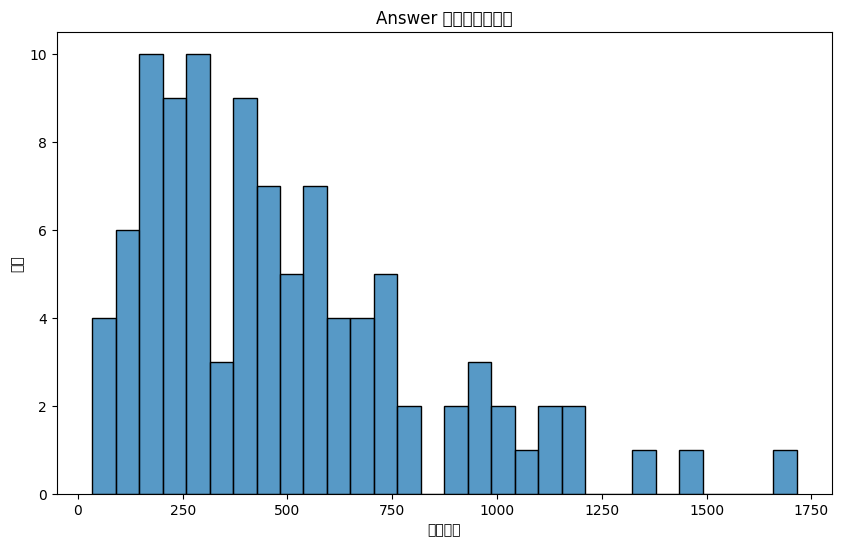

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

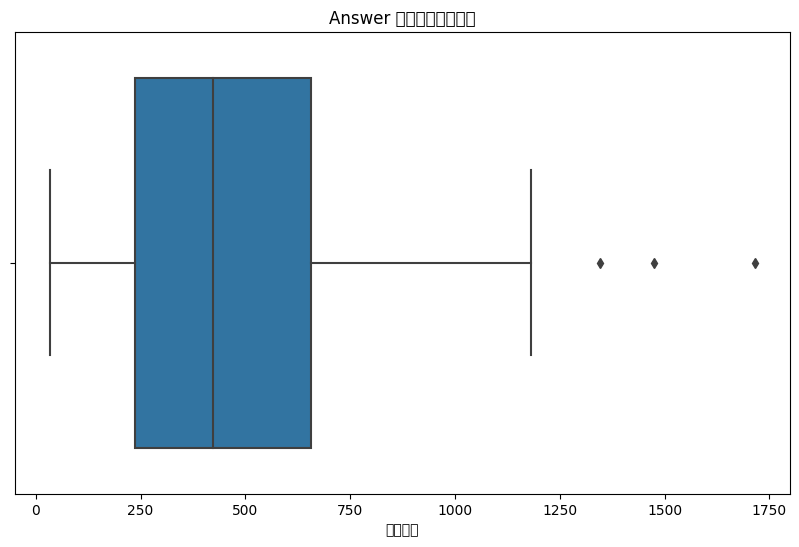

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 df 已经存在，这里只是示例
# 读取数据（如果 df 不是已经在内存中，需要读取文件，如 df = pd.read_csv('your_file.csv') ）

# 计算 answer 列文本的长度
df['answer_length'] = df['Answer'].str.len()

# 计算最大、最小和平均长度
max_length = df['answer_length'].max()
min_length = df['answer_length'].min()
average_length = df['answer_length'].mean()

print(f"答案文本的最大长度: {max_length}")
print(f"答案文本的最小长度: {min_length}")
print(f"答案文本的平均长度: {average_length}")

# 绘制数据分布可视化 - 直方图
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='answer_length', bins=30)
plt.title("Answer 列文本长度分布")
plt.xlabel("文本长度")
plt.ylabel("频数")
plt.show()

# 绘制数据分布可视化 - 箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='answer_length')
plt.title("Answer 列文本长度箱线图")
plt.xlabel("文本长度")
plt.show()

In [48]:

prompt = f"""
### Question:
{query}
### Answer:
"""
model_input = tokenizer(prompt, return_tensors="pt").to(model_device)
with torch.no_grad():
    output = model.generate(**model_input, max_new_tokens=300)
    answer = tokenizer.decode(output[0], skip_special_tokens=True)

text = answer
start_index = text.find("### Answer:\n") + len("### Answer:\n")
extracted_text = text[start_index:]
extracted_text

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Multiple sclerosis (MS) is a chronic inflammatory disease of the central nervous system (CNS) that affects the myelin sheath and axons of neurons. The disease is characterized by a wide range of symptoms, including fatigue, weakness, vision problems, pain, and cognitive and emotional problems. The cause of MS is unknown, but it is believed to be an autoimmune disease in which the body’s immune system attacks its own cells. There is no cure for MS, but there are treatments available to help manage the symptoms and slow the progression of the disease. These treatments include medications, physical therapy, and other therapies such as acupuncture and cognitive behavioral therapy. It is important for people with MS to work closely with their healthcare provider to develop a treatment plan that is tailored to their individual needs.'

In [47]:
text

'\n    ### Question:\n    How to manage multiple sclerosis?\n    ### Answer:\n    1. What is multiple sclerosis?'

In [44]:
df.head()

,Question,Answer
0,How to manage type 2 diabetes?,"1. The patient's medical history, specific..."
1,What's the treatment for hypertension?,"1. Amlodipine 5 mg once daily, along with ..."
2,How to deal with common cold symptoms?,1. Rest and drink plenty of fluids.\n 2. S...
3,What's the best way to treat a sprained ankle?,"1. Rest, ice, compression, and elevation (..."
4,How to relieve chronic back pain?,1. The patient has no significant health p...


In [35]:
with torch.no_grad():
    output = model.generate(**model_input, max_new_tokens=300)
    answer = tokenizer.decode(output[0], skip_special_tokens=True)
    print(answer)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.




### Question:
How to manage multiple sclerosis?
### Answer:
There is no cure for multiple sclerosis (MS). Treatment can help manage the condition and improve quality of life. Treatment options include medications, lifestyle changes, and rehabilitation.


["{'PatientInformation': {'ChiefComplaints': ['Right hemifacial spasm persisting for 2 years', 'No sig", "{'PatientInformation': {'ChiefComplaints': ['Presenting complaints of pain and swelling in the right", "{'PatientInformation': {'ChiefComplaints': ['Complaints of pain and swelling in the right back for s"]

In [1]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

from transformers import  AutoTokenizer, BitsAndBytesConfig, AutoModelForCausalLM
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained("ZiweiChen/BioMistral-Clinical-7B")
model1 = AutoModelForCausalLM.from_pretrained("ZiweiChen/BioMistral-Clinical-7B", quantization_config=bnb_config)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 20.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00:00:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.6 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 

tokenizer_config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

2025-04-25 02:40:59.536428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745548859.720991      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745548859.777390      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

model-00004-of-00006.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00006.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00006-of-00006.safetensors:   0%|          | 0.00/4.25G [00:00<?, ?B/s]

model-00005-of-00006.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00001-of-00006.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00006.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [2]:
model = AutoModelForCausalLM.from_pretrained("BioMistral/BioMistral-7B", quantization_config=bnb_config)

config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.5G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]